In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.visualization.Dendrogram import Dendrogram
from interClusLib.visualization.IntervalParallelCoordinates import IntervalParallelCoordinates
from interClusLib.evaluation.SilhouetteScore import *
from interClusLib.evaluation.DunnIndex import *
from interClusLib.clustering.IntervalAgglomerativeClustering import IntervalAgglomerativeClustering
from interClusLib.clustering.IntervalSOM import IntervalSOM
from interClusLib.clustering.IntervalFuzzyCMeans import IntervalFuzzyCMeans
from interClusLib.metric import *


print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0          5.634464        21.497038        48.525286        96.777333   
1         34.536342        65.347599        21.071408        61.220088   
2         84.488958        89.063452        35.904731        63.900991   
3         30.231910        32.939353        39.731813        55.220647   
4          6.831610        64.988849        12.453409        35.250887   
5         49.377982        55.042563        40.140371        91.092046   
6         44.015574        78.096009        13.778453        71.030918   
7          8.133699        61.390126        45.801425        86.753662   
8         16.975539        30.799314        49.529745        96.615976   
9         60.645417        84.218497        86.737568        92.193483   
10        71.005921        97.657586         3.536520        96.285

In [13]:
model = IntervalAgglomerativeClustering(n_clusters=4, linkage='complete')

model.fit(random_data.get_intervals())

print(model.get_labels())

print(silhouette_score(random_data.get_intervals(),model.get_labels(),metric='euclidean'))

[1 3 0 1 3 2 0 1 2 0 0 1 3 1 0 1 3 2 0 3 0 2 2 2 0 2 0 0 3 0]
0.19224404555511737


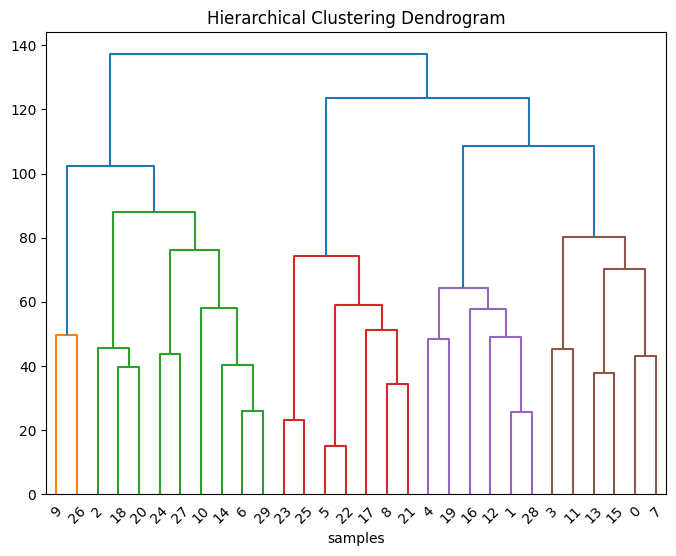

<Figure size 1000x600 with 0 Axes>

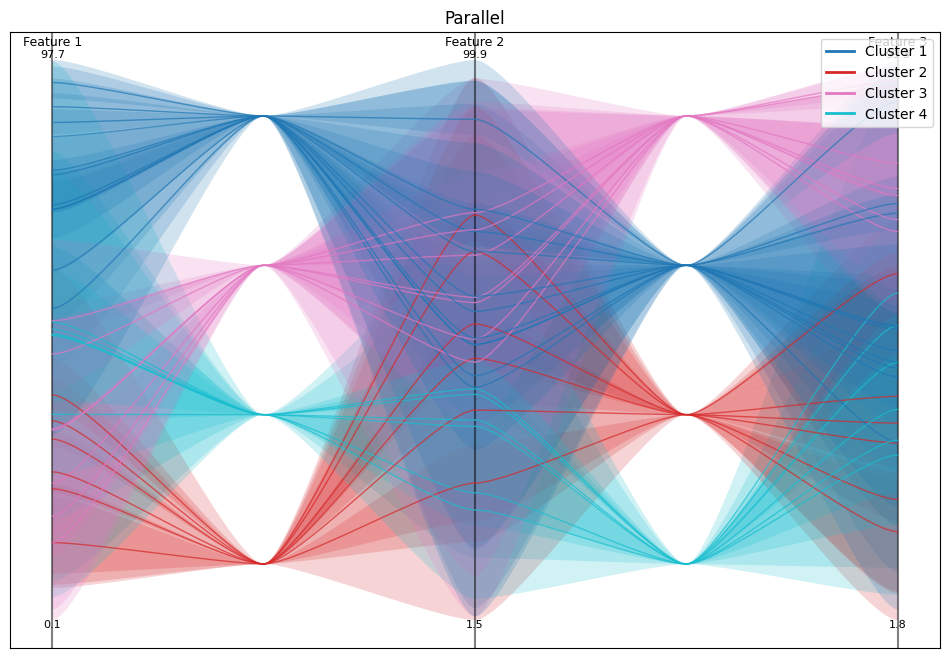

In [14]:
plt.figure(figsize=(8, 6))
Dendrogram.plot_dendrogram(model.model_)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plt.xlabel("samples")
plt.show()

plt.figure(figsize=(10, 6))
IntervalParallelCoordinates.plot_interval_curves(data = random_data.get_intervals(), feature_names= None, clusters=model.get_labels(), beta = 1)
plt.title("Parallel")
plt.show()

In [4]:
model = IntervalFuzzyCMeans(n_clusters=4, max_iter=200,adaptive_weights=True)

model.fit(random_data.get_intervals())

model.get_membership()

array([[0.11841065, 0.31443415, 0.3060379 , 0.26111729],
       [0.03480821, 0.0539378 , 0.67994277, 0.23131122],
       [0.42950813, 0.1028728 , 0.17607607, 0.291543  ],
       [0.08924427, 0.44805687, 0.27647987, 0.18621899],
       [0.09341662, 0.18846955, 0.42295673, 0.2951571 ],
       [0.23505032, 0.4627449 , 0.12967559, 0.17252919],
       [0.05436054, 0.04020657, 0.1607428 , 0.7446901 ],
       [0.12671523, 0.23444102, 0.3539483 , 0.28489545],
       [0.06241002, 0.73762605, 0.09250417, 0.10745976],
       [0.64725376, 0.13936582, 0.08613877, 0.12724166],
       [0.34674018, 0.13717195, 0.1728    , 0.34328787],
       [0.06674518, 0.16913464, 0.54731569, 0.21680449],
       [0.12190219, 0.2075368 , 0.3885951 , 0.2819659 ],
       [0.08246441, 0.1819878 , 0.3063756 , 0.42917219],
       [0.2696064 , 0.11206103, 0.20934492, 0.40898765],
       [0.06291158, 0.18641362, 0.40623316, 0.34444164],
       [0.06528322, 0.1099316 , 0.46997487, 0.35481031],
       [0.06452831, 0.68075832,

In [5]:
model.get_crisp_assignments()

print(silhouette_score(random_data.get_intervals(),model.get_crisp_assignments(),metric='euclidean'))
print(dunn_index(random_data.get_intervals(),model.get_crisp_assignments(),metric='euclidean'))

0.13871799778005628
0.27456646229946546


In [6]:
n_dims = random_data.get_intervals().shape[1]

som = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som.pca_weights_init(random_data.get_intervals())

In [7]:
som.train_incremental(random_data.get_intervals(), verbose= False)

assignments = som.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)

som.topographic_error(random_data.get_intervals())


Neuron (1, 1) has these sample indices => [0, 1, 4, 7, 11, 12, 13, 15, 16, 19, 28]
Neuron (1, 0) has these sample indices => [2, 6, 10, 14, 18, 20, 27, 29]
Neuron (0, 1) has these sample indices => [3, 8, 17, 21, 23, 25]
Neuron (0, 0) has these sample indices => [5, 9, 22, 24, 26]


0.0

In [8]:
som_2 = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som_2.pca_weights_init(random_data.get_intervals())

In [9]:
som_2.train_batch(random_data.get_intervals(), verbose= False)

assignments = som_2.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)

som_2.topographic_error(random_data.get_intervals())

Neuron (1, 1) has these sample indices => [0, 1, 4, 6, 7, 11, 12, 13, 14, 15, 16, 19, 20, 28, 29]
Neuron (1, 0) has these sample indices => [2, 10, 27]
Neuron (0, 0) has these sample indices => [3, 5, 8, 9, 17, 21, 22, 23, 24, 25, 26]
Neuron (0, 1) has these sample indices => [18]


0.0